In [1]:
import data_api
api = data_api.configure()

In [2]:
data = api.get_data(channels=[
                    'SINSB02-RIQM-DCP10:FOR-PHASE-AVG', 
                    'SINDI01-RIQM-DCP10:FOR-PHASE-AVG', 
                    'S10CB01-RIQM-DCP10:FOR-PHASE-AVG',
                  ], 
                  start="2016-07-29 14:01", end="2016-07-29 14:02", 
                  index_field="date")


In [3]:
# Plotting with plotly - interactive

# Import Plotly Offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)

In [4]:
# Correlation Plot
import plotly.graph_objs as go
trace = go.Scatter(
    x = data[data.columns[0]],
    y = data[data.columns[2]],
    mode='markers')

iplot([trace])

In [5]:
# Plot Rolling-Mean
rolling_mean = data.rolling(window=120).mean()

import plotly.graph_objs as go
trace1 = go.Scatter(
    y = data[data.columns[0]])
trace2 = go.Scatter(
    y = rolling_mean[data.columns[0]])

iplot([trace1, trace2])

In [6]:
# Plotting with matplotlib
%matplotlib nbagg
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


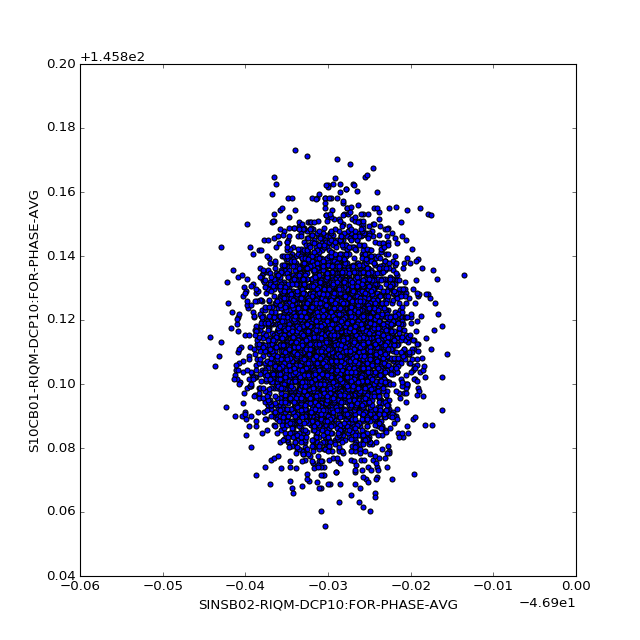

In [7]:
# Correlation Plot
data.plot(kind='scatter', x=data.columns[0], y=data.columns[2], figsize=(8,8), style='.')

<IPython.core.display.Javascript object>


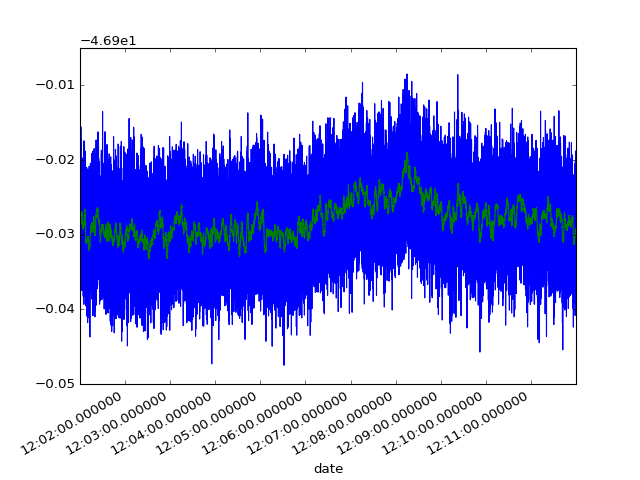

In [37]:
# Plot Rolling-Mean
rolling_mean = data.rolling(window=120).mean()

plt.figure()
data[data.columns[0]].plot()
rolling_mean[data.columns[0]].plot()


In [8]:
# With pandas is easy to compute statistical properties of data. 
# More details can be seen here: http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html

# correlation matrix
data[[data.columns[0], data.columns[2]]].corr()

,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG
SINSB02-RIQM-DCP10:FOR-PHASE-AVG,1.000000,0.011046
S10CB01-RIQM-DCP10:FOR-PHASE-AVG,0.011046,1.000000


In [9]:
data.describe()

,SINSB02-RIQM-DCP10:FOR-PHASE-AVG,SINDI01-RIQM-DCP10:FOR-PHASE-AVG,S10CB01-RIQM-DCP10:FOR-PHASE-AVG
count,6001.000000,6.001000e+03,6001.000000
mean,-46.929590,3.148487e+02,145.913398
std,0.004181,4.735451e-11,0.016366
min,-46.944260,3.148487e+02,145.855480
25%,-46.932407,3.148487e+02,145.902730
50%,-46.929600,3.148487e+02,145.913160
75%,-46.926720,3.148487e+02,145.924150
max,-46.913517,3.148487e+02,145.973040
